In [1]:
using PyPlot

In [2]:
function FTCS(t, x, start)
    l_t = length(t)
    Delta_t = (t[l_t]-t[1])/(l_t-1)
    l_x = length(x)
    Delta_x = (x[l_x]-x[1])/(l_x-1)
    u = Array(Float64, l_x, l_t)
    u[:,1] = start
    for t_i in 1:l_t-1
        u[1, t_i+1] = u[1, t_i]
        u[l_x, t_i+1] = u[l_x, t_i]
        for x_i in 2:l_x-1
            u[x_i, t_i+1] = u[x_i, t_i] + Delta_t/Delta_x^2 * (u[x_i+1, t_i]+u[x_i-1, t_i]-2*u[x_i, t_i])
        end
    end
    return u
end

FTCS (generic function with 1 method)

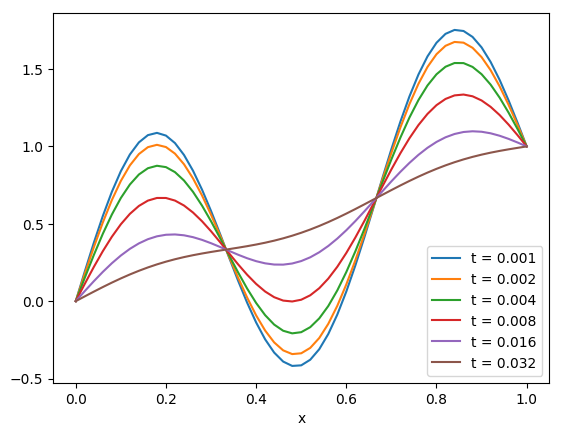

In [33]:
Delta_x = .02
Delta_t = .25*Delta_x^2
n = 5
x = linspace(0, 1, Int(1/Delta_x)+1)
t = linspace(0, 1e-3*2^n, Int(1e-3*2^n/Delta_t)+1)
start =[sin(3*pi*i)+i for i in x]
result = FTCS(t, x, start)
t_list = [1e-3*2^i for i in 0:n]
for t_i in t_list
    index = findfirst(t, t_i)
    plot(x, result[:,index], label="t = $t_i")
end
xlabel("x")
legend()
show()

In [29]:
result[:,1]

51-element Array{Float64,1}:
 0.0     
 0.207381
 0.408125
 0.595827
 0.764547
 0.909017
 1.02483 
 1.10858 
 1.15803 
 1.17211 
 1.15106 
 1.09631 
 1.01051 
 ⋮       
 1.65631 
 1.75106 
 1.81211 
 1.83803 
 1.82858 
 1.78483 
 1.70902 
 1.60455 
 1.47583 
 1.32812 
 1.16738 
 1.0     